# Pymaceuticals

#### Analysis
From a given fake study of drug effects on cancer treatment, perform some data manipulation and analysis to visualize a comparison of the effects of 3 distict drugs and a placebo. 
- With a trial period of 45 days, the drup Capomulin showed overall positive results with tumor volume decrease, lower metastatic spread and mortality rate. 
- The drug with the least effects were Ketrapil and Infubinol, achieving similar results as the the effects observed with the Placebo.
- As expected the Placebo treatement showed the largest metastatic spread.
- The number of subjects over which the tests were performed is a small sample and might skew the overall observations.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Read data it into pandas dataframes
pathclinical = os.path.join('raw_data','clinicaltrial_data.csv')
pathmouse = os.path.join('raw_data','mouse_drug_data.csv')
clinical_df = pd.read_csv(pathclinical)
mouse_df = pd.read_csv(pathmouse)

In [3]:
# Combine clinical data with mouse data into one dataframe. include all rows
combined_df = pd.merge(mouse_df,clinical_df,on='Mouse ID',how='outer')

In [12]:
# Extract data for only the drugs under study 
studydrugs = ['Capomulin','Infubinol','Ketrapil','Placebo']

fig, ax = plt.subplots(figsize=(15,7))
filtered_c = combined_df.loc[combined_df['Drug'] =='Capomulin', :]
filtered_i = combined_df.loc[combined_df['Drug'] =='Infubinol', :]
filtered_k = combined_df.loc[combined_df['Drug'] =='Ketapril', :]
filtered_p = combined_df.loc[combined_df['Drug'] =='Placebo', :]

x_values = np.arange(0,50,5)

### Tumor response to treatment

In [13]:
c_values = filtered_c.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
i_values = filtered_i.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
k_values = filtered_k.groupby('Timepoint')['Tumor Volume (mm3)'].mean()
p_values = filtered_p.groupby('Timepoint')['Tumor Volume (mm3)'].mean()

c_err = filtered_c.groupby('Timepoint')['Tumor Volume (mm3)'].sem()
i_err = filtered_i.groupby('Timepoint')['Tumor Volume (mm3)'].sem()
k_err = filtered_k.groupby('Timepoint')['Tumor Volume (mm3)'].sem()
p_err = filtered_p.groupby('Timepoint')['Tumor Volume (mm3)'].sem()

plt.errorbar(x_values, c_values, c_err, elinewidth=0.5, ecolor='red',ls='dashed',lw=0.5,color='red')
plt.errorbar(x_values, i_values, i_err, elinewidth=0.5, ecolor='blue',ls='dashed',lw=0.5,color='blue')
plt.errorbar(x_values, k_values, k_err, elinewidth=0.5, ecolor='green',ls='dashed',lw=0.5,color='green')
plt.errorbar(x_values, p_values, p_err, elinewidth=0.5, ecolor='magenta',ls='dashed',lw=0.5,color='magenta')

plt.scatter(x_values,c_values, marker='o',color="red", label="Capomulin")
plt.scatter(x_values,i_values, marker='^',color="blue", label="Infubinol")
plt.scatter(x_values,k_values, marker='s',color="green", label="Ketapril")
plt.scatter(x_values,p_values, marker='*',color="magenta", label="Placebo")



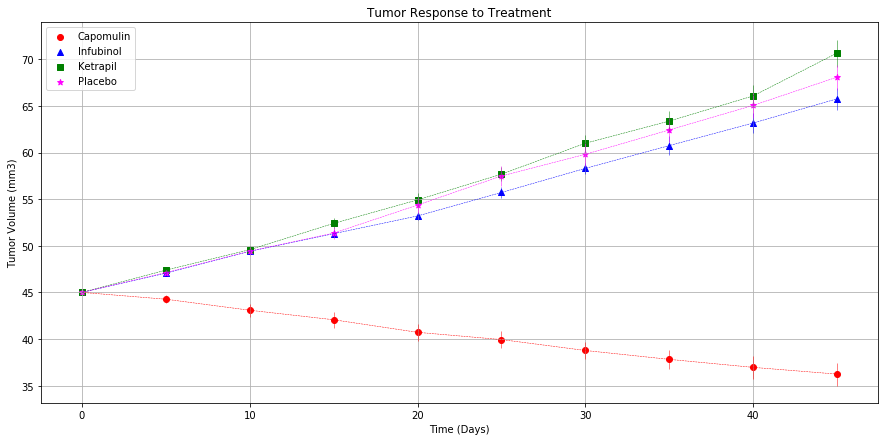

In [14]:
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.grid()
plt.legend(studydrugs)
plt.show()

### Metatstastic Response to Treatment

In [15]:
# average the metastatic response for all drugs during the treatment period
c_values = filtered_c.groupby('Timepoint')['Metastatic Sites'].mean()
i_values = filtered_i.groupby('Timepoint')['Metastatic Sites'].mean()
k_values = filtered_k.groupby('Timepoint')['Metastatic Sites'].mean()
p_values = filtered_p.groupby('Timepoint')['Metastatic Sites'].mean()

c_err = filtered_c.groupby('Timepoint')['Metastatic Sites'].sem()
i_err = filtered_i.groupby('Timepoint')['Metastatic Sites'].sem()
k_err = filtered_k.groupby('Timepoint')['Metastatic Sites'].sem()
p_err = filtered_p.groupby('Timepoint')['Metastatic Sites'].sem()

fig, ax = plt.subplots(figsize=(15,7))

plt.errorbar(x_values, c_values, c_err, elinewidth=0.5, ecolor='red',ls='dashed',lw=0.5,color='red')
plt.errorbar(x_values, i_values, i_err, elinewidth=0.5, ecolor='blue',ls='dashed',lw=0.5,color='blue')
plt.errorbar(x_values, k_values, k_err, elinewidth=0.5, ecolor='green',ls='dashed',lw=0.5,color='green')
plt.errorbar(x_values, p_values, p_err, elinewidth=0.5, ecolor='magenta',ls='dashed',lw=0.5,color='magenta')

plt.scatter(x_values,c_values, marker='o',color="red", label="Capomulin")
plt.scatter(x_values,i_values, marker='^',color="blue", label="Infubinol")
plt.scatter(x_values,k_values, marker='s',color="green", label="Ketapril")
plt.scatter(x_values,p_values, marker='*',color="magenta", label="Placebo")

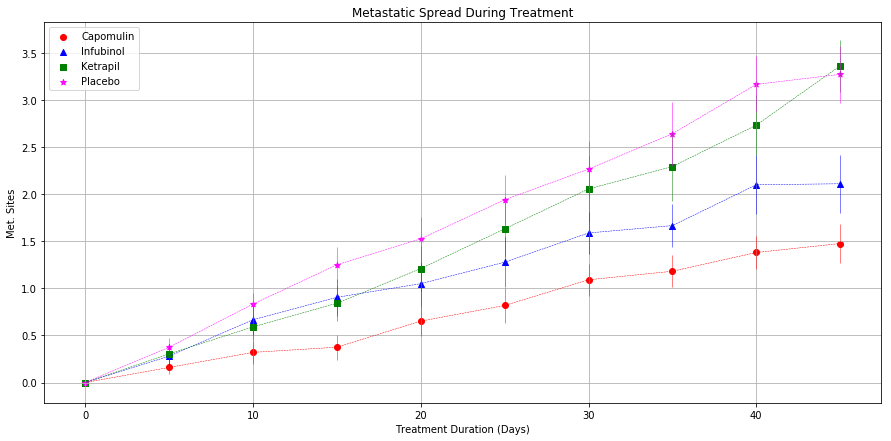

In [16]:
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)')
plt.title('Metastatic Spread During Treatment')
plt.grid()
plt.legend(studydrugs)
plt.show()

### Survival rates

In [17]:
# Count how many mice per drug per point in time
c_values = filtered_c.groupby('Timepoint')['Mouse ID'].count()
i_values = filtered_i.groupby('Timepoint')['Mouse ID'].count()
k_values = filtered_k.groupby('Timepoint')['Mouse ID'].count()
p_values = filtered_p.groupby('Timepoint')['Mouse ID'].count()

#get percentage
c_values = (c_values/25)*100
i_values = (i_values/25)*100
k_values = (k_values/25)*100
p_values = (p_values/25)*100

c_err = c_values.sem()
i_err = i_values.sem()
k_err = k_values.sem()
p_err = p_values.sem()

fig, ax = plt.subplots(figsize=(15,7))

plt.errorbar(x_values, c_values, c_err, elinewidth=0.5, ecolor='red',ls='dashed',lw=0.5,color='red')
plt.errorbar(x_values, i_values, i_err, elinewidth=0.5, ecolor='blue',ls='dashed',lw=0.5,color='blue')
plt.errorbar(x_values, k_values, k_err, elinewidth=0.5, ecolor='green',ls='dashed',lw=0.5,color='green')
plt.errorbar(x_values, p_values, p_err, elinewidth=0.5, ecolor='magenta',ls='dashed',lw=0.5,color='magenta')


plt.scatter(x_values,c_values, marker='o',color="red", label="Capomulin")
plt.scatter(x_values,i_values, marker='^',color="blue", label="Infubinol")
plt.scatter(x_values,k_values, marker='s',color="green", label="Ketapril")
plt.scatter(x_values,p_values, marker='*',color="magenta", label="Placebo")

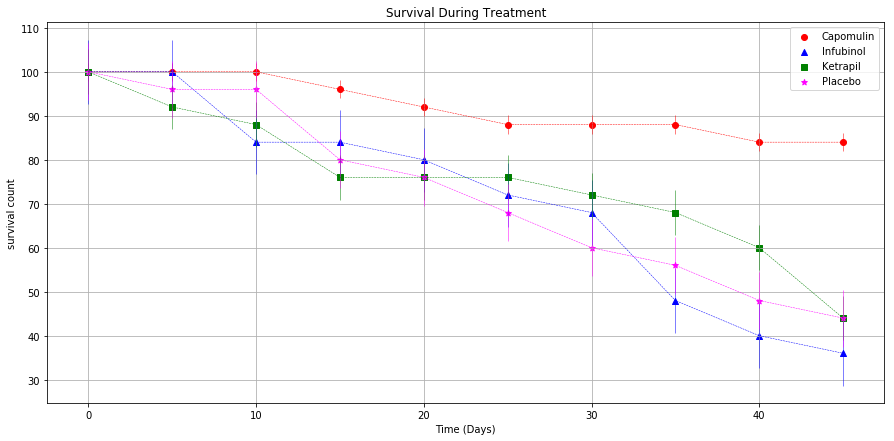

In [18]:
plt.ylabel('survival count')
plt.xlabel('Time (Days)')
plt.title('Survival During Treatment')
plt.grid()
plt.legend(studydrugs)
plt.show()

### Summary bar graph

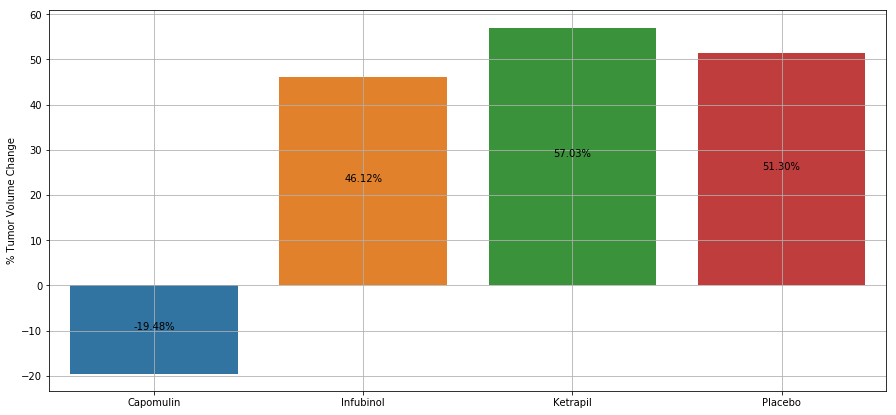

In [20]:
start_c = filtered_c.loc[filtered_c['Timepoint']==0,:]['Tumor Volume (mm3)'].mean()
end_c = filtered_c.loc[filtered_c['Timepoint']==45,:]['Tumor Volume (mm3)'].mean()
changes_c = 100*((end_c-start_c)/start_c)

start_i = filtered_i.loc[filtered_i['Timepoint']==0,:]['Tumor Volume (mm3)'].mean()
end_i = filtered_i.loc[filtered_i['Timepoint']==45,:]['Tumor Volume (mm3)'].mean()
changes_i = 100*((end_i-start_i)/start_i)

start_k = filtered_k.loc[filtered_k['Timepoint']==0,:]['Tumor Volume (mm3)'].mean()
end_k = filtered_k.loc[filtered_k['Timepoint']==45,:]['Tumor Volume (mm3)'].mean()
changes_k = 100*((end_k-start_k)/start_k)

start_p = filtered_p.loc[filtered_p['Timepoint']==0,:]['Tumor Volume (mm3)'].mean()
end_p = filtered_p.loc[filtered_p['Timepoint']==45,:]['Tumor Volume (mm3)'].mean()
changes_p = 100*((end_p-start_p)/start_p)

index = np.arange(4)
values = [changes_c,changes_i,changes_k,changes_p]

fig, ax = plt.subplots(figsize=(15,7))
import seaborn as sns
sns.barplot(index,values)
plt.xticks(index, studydrugs)
plt.grid()
plt.ylabel('% Tumor Volume Change')
for a in index:
    plt.annotate(
            '{:,.2f}%'.format(values[a]),  # Use values formated as label
            (a, values[a]/2),              # Place label at center of the bar
            ha='center')                   # align to center

plt.show()